### Problem Statement : **Predict for how long an employee will be absent based on features given in the dataset.**

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("absenteeism_at_work/Absenteeism_at_work.csv")
dataset.head()

ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours
0  11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;...                                                                                                                                                                                                                                                  
1  36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0...                                                                                                                                                                                                                                                  
2  3;23;7;4;1;179;51;18;38;239.554;97;0;1;0;1;0;0...                                                                                                                                                                                                                                                  
3  7;7;7;5;1;279;5;14;39;239.554;97;0;1;2;1;1;0;6...                                                                                                                                                                                                                                                  
4  11;23;7;5;1;289;36;13;33;239.554;97;0;1;2;1;0;...

In [4]:
dataset.shape

(740, 1)

In [5]:
for index, row in dataset.iterrows():
    print(row)

ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours    11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;...
Name: 0, dtype: object
ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours    36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0...
Name: 1, dtype: object
ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass i

In [6]:
for index, row in dataset.iterrows():
    values = row['ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours'].split(';')
    dataset.loc[index, 'ID'] = values[0]
    dataset.loc[index, 'Reason for absence'] = values[1]
    dataset.loc[index, 'Month of absence'] = values[2]
    dataset.loc[index, 'Day of the week'] = values[3]
    dataset.loc[index, 'Seasons'] = values[4]
    dataset.loc[index, 'Transportation expense'] = values[5]
    dataset.loc[index, 'Distance from Residence to Work'] = values[6]
    dataset.loc[index, 'Service time'] = values[7]
    dataset.loc[index, 'Age'] = values[8]
    dataset.loc[index, 'Work load Average/day'] = values[9]
    dataset.loc[index, 'Hit target'] = values[10]
    dataset.loc[index, 'Disciplinary failure'] = values[11]
    dataset.loc[index, 'Education'] = values[12]
    dataset.loc[index, 'Son'] = values[13]
    dataset.loc[index, 'Social drinker'] = values[14]
    dataset.loc[index, 'Social smoker'] = values[15]
    dataset.loc[index, 'Pet'] = values[16]
    dataset.loc[index, 'Weight'] = values[17]
    dataset.loc[index, 'Height'] = values[18]
    dataset.loc[index, 'Body mass index'] = values[19]
    dataset.loc[index, 'Absenteeism time in hours'] = values[20]

In [7]:
dataset.head()

ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours  \
0  11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;...                                                                                                                                                                                                                                                     
1  36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0...                                                                                                                                                                                                                                                     
2  3;23;7;4;1;179;51;18;38;239.554;97;0;1;0;1;0;0...                                                                                                                                                                                                                                                     
3  7;7;7;5;1;279;5;14;39;239.554;97;0;1;2;1;1;0;6...                                                                                                                                                                                                                                                     
4  11;23;7;5;1;289;36;13;33;239.554;97;0;1;2;1;0;...                                                                                                                                                                                                                                                     

   ID Reason for absence Month of absence Day of the week Seasons  \
0  11                 26                7               3       1   
1  36                  0                7               3       1   
2   3                 23                7               4       1   
3   7                  7                7               5       1   
4  11                 23                7               5       1   

  Transportation expense Distance from Residence to Work Service time Age  \
0                    289                              36           13  33   
1                    118                              13           18  50   
2                    179                              51           18  38   
3                    279                               5           14  39   
4                    289                              36           13  33   

   ... Disciplinary failure Education Son Social drinker Social smoker Pet  \
0  ...                    0         1   2              1             0   1   
1  ...                    1         1   1              1             0   0   
2  ...                    0         1   0              1             0   0   
3  ...                    0         1   2              1             1   0   
4  ...                    0         1   2              1             0   1   

  Weight Height Body mass index Absenteeism time in hours  
0     90    172              30                         4  
1     98    178              31                         0  
2     89    170              31                         2  
3     68    168              24                         4  
4     90    172              30                         2  

[5 rows x 22 columns]

In [8]:
df = dataset.drop(columns = 'ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours')

In [9]:
df.head()

ID Reason for absence Month of absence Day of the week Seasons  \
0  11                 26                7               3       1   
1  36                  0                7               3       1   
2   3                 23                7               4       1   
3   7                  7                7               5       1   
4  11                 23                7               5       1   

  Transportation expense Distance from Residence to Work Service time Age  \
0                    289                              36           13  33   
1                    118                              13           18  50   
2                    179                              51           18  38   
3                    279                               5           14  39   
4                    289                              36           13  33   

  Work load Average/day  ... Disciplinary failure Education Son  \
0               239.554  ...                    0         1   2   
1               239.554  ...                    1         1   1   
2               239.554  ...                    0         1   0   
3               239.554  ...                    0         1   2   
4               239.554  ...                    0         1   2   

  Social drinker Social smoker Pet Weight Height Body mass index  \
0              1             0   1     90    172              30   
1              1             0   0     98    178              31   
2              1             0   0     89    170              31   
3              1             1   0     68    168              24   
4              1             0   1     90    172              30   

  Absenteeism time in hours  
0                         4  
1                         0  
2                         2  
3                         4  
4                         2  

[5 rows x 21 columns]

In [10]:
df.shape

(740, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    object
 1   Reason for absence               740 non-null    object
 2   Month of absence                 740 non-null    object
 3   Day of the week                  740 non-null    object
 4   Seasons                          740 non-null    object
 5   Transportation expense           740 non-null    object
 6   Distance from Residence to Work  740 non-null    object
 7   Service time                     740 non-null    object
 8   Age                              740 non-null    object
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    object
 11  Disciplinary failure             740 non-null    object
 12  Education                        740

In [12]:
df['ID'] = dataset['ID'].astype(float)
df['Reason for absence'] = dataset['Reason for absence'].astype(float)
df['Day of the week'] = dataset['Day of the week'].astype(float)
df['Month of absence'] = dataset['Month of absence'].astype(float)
df['Seasons'] = dataset['Seasons'].astype(float)
df['Transportation expense'] = dataset['Transportation expense'].astype(float)
df['Distance from Residence to Work'] = dataset['Distance from Residence to Work'].astype(float)
df['Service time'] = dataset['Service time'].astype(float)
df['Age'] = dataset['Age'].astype(int)
df['Work load Average/day'] = df['Work load Average/day'].astype(float)
df['Hit target'] = dataset['Hit target'].astype(float)
df['Disciplinary failure'] = dataset['Disciplinary failure'].astype(float).astype(float)
df['Education'] = dataset['Education'].astype(float)
df['Son'] = dataset['Son'].astype(float)
#dataset['Social drinker']
#dataset['Social smoker']
df['Pet'] = dataset['Pet'].astype(float)
df['Weight'] = dataset['Weight'].astype(float)
df['Height'] = dataset['Height'].astype(float)
df['Body mass index'] = dataset['Body mass index'].astype(float)
df['Absenteeism time in hours'] = dataset['Absenteeism time in hours'].astype(float)

In [13]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11.0                26.0               7.0              3.0      1.0   
1  36.0                 0.0               7.0              3.0      1.0   
2   3.0                23.0               7.0              4.0      1.0   
3   7.0                 7.0               7.0              5.0      1.0   
4  11.0                23.0               7.0              5.0      1.0   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                   289.0                             36.0          13.0   33   
1                   118.0                             13.0          18.0   50   
2                   179.0                             51.0          18.0   38   
3                   279.0                              5.0          14.0   39   
4                   289.0                             36.0          13.0   33   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0                239.554  ...                   0.0        1.0  2.0   
1                239.554  ...                   1.0        1.0  1.0   
2                239.554  ...                   0.0        1.0  0.0   
3                239.554  ...                   0.0        1.0  2.0   
4                239.554  ...                   0.0        1.0  2.0   

   Social drinker Social smoker  Pet  Weight  Height  Body mass index  \
0               1             0  1.0    90.0   172.0             30.0   
1               1             0  0.0    98.0   178.0             31.0   
2               1             0  0.0    89.0   170.0             31.0   
3               1             1  0.0    68.0   168.0             24.0   
4               1             0  1.0    90.0   172.0             30.0   

   Absenteeism time in hours  
0                        4.0  
1                        0.0  
2                        2.0  
3                        4.0  
4                        2.0  

[5 rows x 21 columns]

In [14]:
df['Work load Average/day'] = df['Work load Average/day']*1000

In [15]:
df.head(10)

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11.0                26.0               7.0              3.0      1.0   
1  36.0                 0.0               7.0              3.0      1.0   
2   3.0                23.0               7.0              4.0      1.0   
3   7.0                 7.0               7.0              5.0      1.0   
4  11.0                23.0               7.0              5.0      1.0   
5   3.0                23.0               7.0              6.0      1.0   
6  10.0                22.0               7.0              6.0      1.0   
7  20.0                23.0               7.0              6.0      1.0   
8  14.0                19.0               7.0              2.0      1.0   
9   1.0                22.0               7.0              2.0      1.0   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                   289.0                             36.0          13.0   33   
1                   118.0                             13.0          18.0   50   
2                   179.0                             51.0          18.0   38   
3                   279.0                              5.0          14.0   39   
4                   289.0                             36.0          13.0   33   
5                   179.0                             51.0          18.0   38   
6                   361.0                             52.0           3.0   28   
7                   260.0                             50.0          11.0   36   
8                   155.0                             12.0          14.0   34   
9                   235.0                             11.0          14.0   37   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0               239554.0  ...                   0.0        1.0  2.0   
1               239554.0  ...                   1.0        1.0  1.0   
2               239554.0  ...                   0.0        1.0  0.0   
3               239554.0  ...                   0.0        1.0  2.0   
4               239554.0  ...                   0.0        1.0  2.0   
5               239554.0  ...                   0.0        1.0  0.0   
6               239554.0  ...                   0.0        1.0  1.0   
7               239554.0  ...                   0.0        1.0  4.0   
8               239554.0  ...                   0.0        1.0  2.0   
9               239554.0  ...                   0.0        3.0  1.0   

   Social drinker Social smoker  Pet  Weight  Height  Body mass index  \
0               1             0  1.0    90.0   172.0             30.0   
1               1             0  0.0    98.0   178.0             31.0   
2               1             0  0.0    89.0   170.0             31.0   
3               1             1  0.0    68.0   168.0             24.0   
4               1             0  1.0    90.0   172.0             30.0   
5               1             0  0.0    89.0   170.0             31.0   
6               1             0  4.0    80.0   172.0             27.0   
7               1             0  0.0    65.0   168.0             23.0   
8               1             0  0.0    95.0   196.0             25.0   
9               0             0  1.0    88.0   172.0             29.0   

   Absenteeism time in hours  
0                        4.0  
1                        0.0  
2                        2.0  
3                        4.0  
4                        2.0  
5                        2.0  
6                        8.0  
7                        4.0  
8                       40.0  
9                        8.0  

[10 rows x 21 columns]

In [16]:
df['Work load Average/day'] = df['Work load Average/day'].astype(int)

In [17]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11.0                26.0               7.0              3.0      1.0   
1  36.0                 0.0               7.0              3.0      1.0   
2   3.0                23.0               7.0              4.0      1.0   
3   7.0                 7.0               7.0              5.0      1.0   
4  11.0                23.0               7.0              5.0      1.0   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                   289.0                             36.0          13.0   33   
1                   118.0                             13.0          18.0   50   
2                   179.0                             51.0          18.0   38   
3                   279.0                              5.0          14.0   39   
4                   289.0                             36.0          13.0   33   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0                 239554  ...                   0.0        1.0  2.0   
1                 239554  ...                   1.0        1.0  1.0   
2                 239554  ...                   0.0        1.0  0.0   
3                 239554  ...                   0.0        1.0  2.0   
4                 239554  ...                   0.0        1.0  2.0   

   Social drinker Social smoker  Pet  Weight  Height  Body mass index  \
0               1             0  1.0    90.0   172.0             30.0   
1               1             0  0.0    98.0   178.0             31.0   
2               1             0  0.0    89.0   170.0             31.0   
3               1             1  0.0    68.0   168.0             24.0   
4               1             0  1.0    90.0   172.0             30.0   

   Absenteeism time in hours  
0                        4.0  
1                        0.0  
2                        2.0  
3                        4.0  
4                        2.0  

[5 rows x 21 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    float64
 1   Reason for absence               740 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    float64
 4   Seasons                          740 non-null    float64
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    float64
 8   Age                              740 non-null    int32  
 9   Work load Average/day            740 non-null    int32  
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    float64
 12  Education             

In [19]:
print(df['Social drinker'].nunique())
print(df['Social smoker'].nunique())

2
2


In [20]:
df['Social drinker'] = np.where(df['Social drinker'] == '1' , 1.0 ,0.0)
df['Social smoker'] = np.where(df['Social smoker'] == '1' , 1.0 ,0.0)

In [21]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11.0                26.0               7.0              3.0      1.0   
1  36.0                 0.0               7.0              3.0      1.0   
2   3.0                23.0               7.0              4.0      1.0   
3   7.0                 7.0               7.0              5.0      1.0   
4  11.0                23.0               7.0              5.0      1.0   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                   289.0                             36.0          13.0   33   
1                   118.0                             13.0          18.0   50   
2                   179.0                             51.0          18.0   38   
3                   279.0                              5.0          14.0   39   
4                   289.0                             36.0          13.0   33   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0                 239554  ...                   0.0        1.0  2.0   
1                 239554  ...                   1.0        1.0  1.0   
2                 239554  ...                   0.0        1.0  0.0   
3                 239554  ...                   0.0        1.0  2.0   
4                 239554  ...                   0.0        1.0  2.0   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0             1.0            0.0  1.0    90.0   172.0             30.0   
1             1.0            0.0  0.0    98.0   178.0             31.0   
2             1.0            0.0  0.0    89.0   170.0             31.0   
3             1.0            1.0  0.0    68.0   168.0             24.0   
4             1.0            0.0  1.0    90.0   172.0             30.0   

   Absenteeism time in hours  
0                        4.0  
1                        0.0  
2                        2.0  
3                        4.0  
4                        2.0  

[5 rows x 21 columns]

In [22]:
df.describe()

ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service time         Age  Work load Average/day  ...  \
count    740.000000  740.000000             740.000000  ...   
mean      12.554054   36.450000          271490.198649  ...   
std        4.384873    6.478772           39058.125528  ...   
min        1.000000   27.000000          205917.000000  ...   
25%        9.000000   31.000000          244387.000000  ...   
50%       13.000000   37.000000          264249.000000  ...   
75%       16.000000   40.000000          294217.000000  ...   
max       29.000000   58.000000          378884.000000  ...   

       Disciplinary failure   Education         Son  Social drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social smoker         Pet      Weight      Height  Body mass index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism time in hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000  

[8 rows x 21 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    float64
 1   Reason for absence               740 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    float64
 4   Seasons                          740 non-null    float64
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    float64
 8   Age                              740 non-null    int32  
 9   Work load Average/day            740 non-null    int32  
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    float64
 12  Education             

In [24]:
df.to_csv("absenteeism_at_work_converted.csv")

In [25]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [26]:
print(df.columns)

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In terms of plot types for **univariate**, **bivariate**, and **multivariate** analyses based on your dataset, here’s a breakdown with more details on the plot types and their suitability for specific data types:

---

### 1. **Univariate Analysis**
Univariate analysis focuses on analyzing each variable individually.

- **For Categorical Variables**:
    - **Bar Plot**: Shows the frequency of each category in a categorical variable. It’s great for understanding how categories compare in terms of occurrences.
      - Example: `sns.countplot(x='Reason for absence', data=df)`
    - **Pie Chart**: Displays the proportion of each category relative to the whole. It is useful when you want to represent parts of a whole but is less effective when comparing multiple categories.
      - Example: `df['Seasons'].value_counts().plot(kind='pie', autopct='%1.1f%%')`

- **For Numerical Variables**:
    - **Histogram**: Useful for showing the distribution of a single numeric variable. It helps in identifying the spread, skewness, and modality (unimodal, bimodal) of the data.
      - Example: `plt.hist(df['Age'], bins=10)`
    - **Box Plot**: Useful for visualizing the distribution, central tendency (median), quartiles, and outliers of the data. Particularly effective for spotting outliers and comparing distributions across different groups.
      - Example: `sns.boxplot(x='Absenteeism time in hours', data=df)`
    - **Density Plot (KDE)**: Shows a smoothed estimate of the distribution of a numeric variable. This is an alternative to histograms when you want a continuous curve.
      - Example: `sns.kdeplot(df['Transportation expense'])`

---

### 2. **Bivariate Analysis**
Bivariate analysis examines the relationship between two variables. The type of plot depends on whether the variables are **categorical** or **numerical**.

- **Categorical vs. Categorical**:
    - **Clustered Bar Plot**: Allows comparison of two categorical variables by showing their frequencies side by side.
      - Example: `sns.countplot(x='Day of the week', hue='Reason for absence', data=df)`
    - **Stacked Bar Plot**: Similar to a clustered bar plot, but the bars are stacked, making it easier to see the total across categories.
      - Example: `df.groupby(['Day of the week', 'Reason for absence']).size().unstack().plot(kind='bar', stacked=True)`
    - **Heatmap**: Visualizes the frequency of combinations between two categorical variables using colors.
      - Example: `sns.heatmap(pd.crosstab(df['Day of the week'], df['Reason for absence']), annot=True)`

- **Categorical vs. Numerical**:
    - **Box Plot**: Displays the distribution of the numerical variable across different levels of a categorical variable. It highlights outliers and the spread of the data.
      - Example: `sns.boxplot(x='Seasons', y='Absenteeism time in hours', data=df)`
    - **Violin Plot**: Combines the features of a box plot with a KDE (density plot) on each side, showing both the distribution and summary statistics.
      - Example: `sns.violinplot(x='Education', y='Transportation expense', data=df)`
    - **Strip Plot**: Visualizes all observations as individual points along a categorical axis. It’s great for showing the distribution of a numerical variable and the spread for each category.
      - Example: `sns.stripplot(x='Seasons', y='Absenteeism time in hours', data=df)`

- **Numerical vs. Numerical**:
    - **Scatter Plot**: Shows the relationship between two numerical variables. It’s perfect for identifying correlations, clusters, or trends.
      - Example: `sns.scatterplot(x='Age', y='Service time', data=df)`
    - **Joint Plot**: Combines a scatter plot with histograms or KDE plots for each variable to give a detailed view of their relationship.
      - Example: `sns.jointplot(x='Age', y='Service time', data=df, kind='scatter')`
    - **Correlation Heatmap**: Shows the pairwise correlation between multiple numerical variables. The correlation values are color-coded to indicate strength and direction of the relationship.
      - Example: `sns.heatmap(df.corr(), annot=True)`

---

### 3. **Multivariate Analysis**
Multivariate analysis looks at more than two variables at once. This is useful for exploring how multiple variables interact with each other.

- **Categorical and Numerical**:
    - **Facet Grid**: A series of small multiple plots that show the distribution of a numerical variable split across levels of one or more categorical variables.
      - Example: `g = sns.FacetGrid(df, col='Seasons', row='Social drinker', margin_titles=True); g.map(plt.hist, 'Absenteeism time in hours')`
    - **3D Scatter Plot**: When dealing with three numerical variables, this plot helps visualize their relationship in three dimensions.
      - Example: 
        ```python
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df['Age'], df['Service time'], df['Absenteeism time in hours'])
        plt.show()
        ```

- **Numerical vs. Multiple Categorical**:
    - **Interaction Plot**: Used to observe how the interaction between categorical variables impacts a numerical outcome. It is particularly useful in regression analysis and ANOVA.
      - Example: Analyze the interaction between `'Social smoker'` and `'Education'` on `'Absenteeism time in hours'`.

- **Pairwise Relationships**:
    - **Pair Plot (Pairwise Scatter Plot)**: Shows scatter plots for every possible pair of numerical variables. It’s a great way to explore pairwise correlations in large datasets.
      - Example: `sns.pairplot(df[['Age', 'Service time', 'Work load Average/day']])`
    - **Multivariate Correlation Heatmap**: An extension of a correlation heatmap to analyze relationships between more than two variables simultaneously.
      - Example: `sns.heatmap(df[['Age', 'Service time', 'Work load Average/day', 'Body mass index']].corr(), annot=True)`

---

These plots will help you analyze your dataset from different perspectives, based on the relationships between variables, whether they are univariate, bivariate, or multivariate in nature.

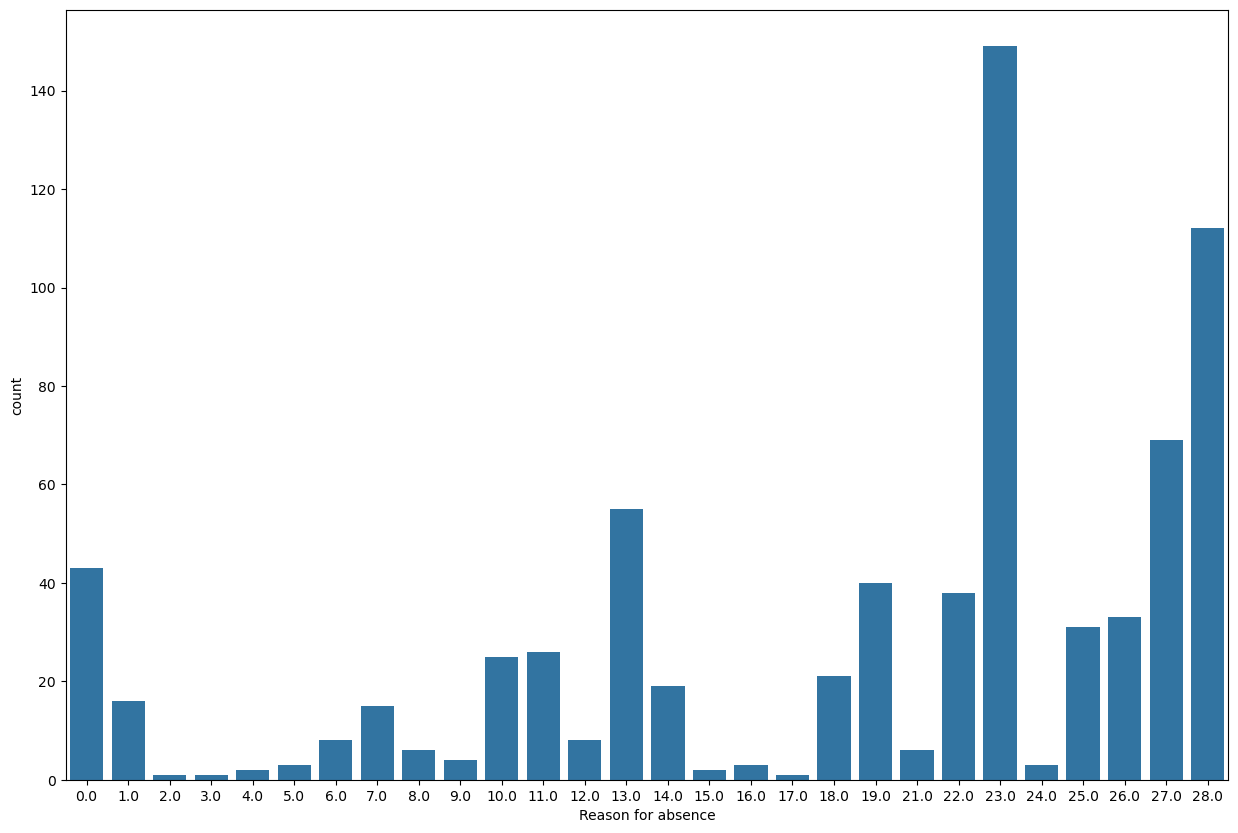

In [29]:
plt.figure(figsize = (15,10))
sns.countplot(x='Reason for absence', data=df)
plt.show()

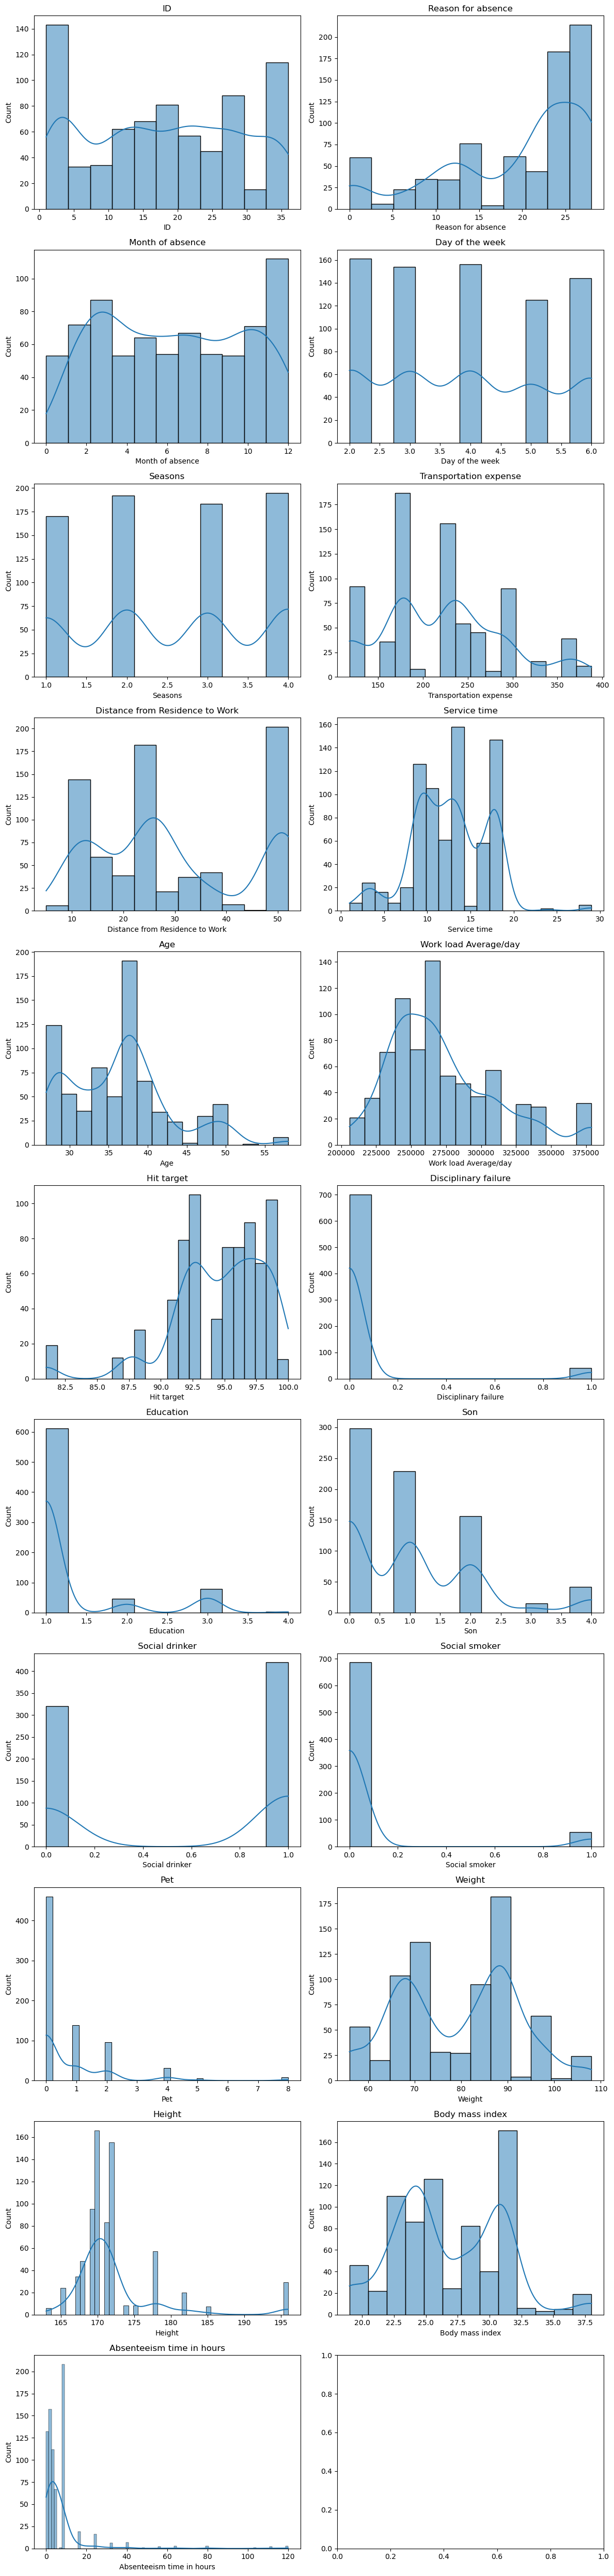

In [30]:
fig, axs = plt.subplots(nrows=len(df.columns) // 2 + 1, ncols=2, figsize=(12, 50))
for i, col in enumerate(df.columns):
    row = i // 2
    col_idx = i % 2
    sns.histplot(x=df[col], kde=True, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(col)
plt.tight_layout()
plt.show()

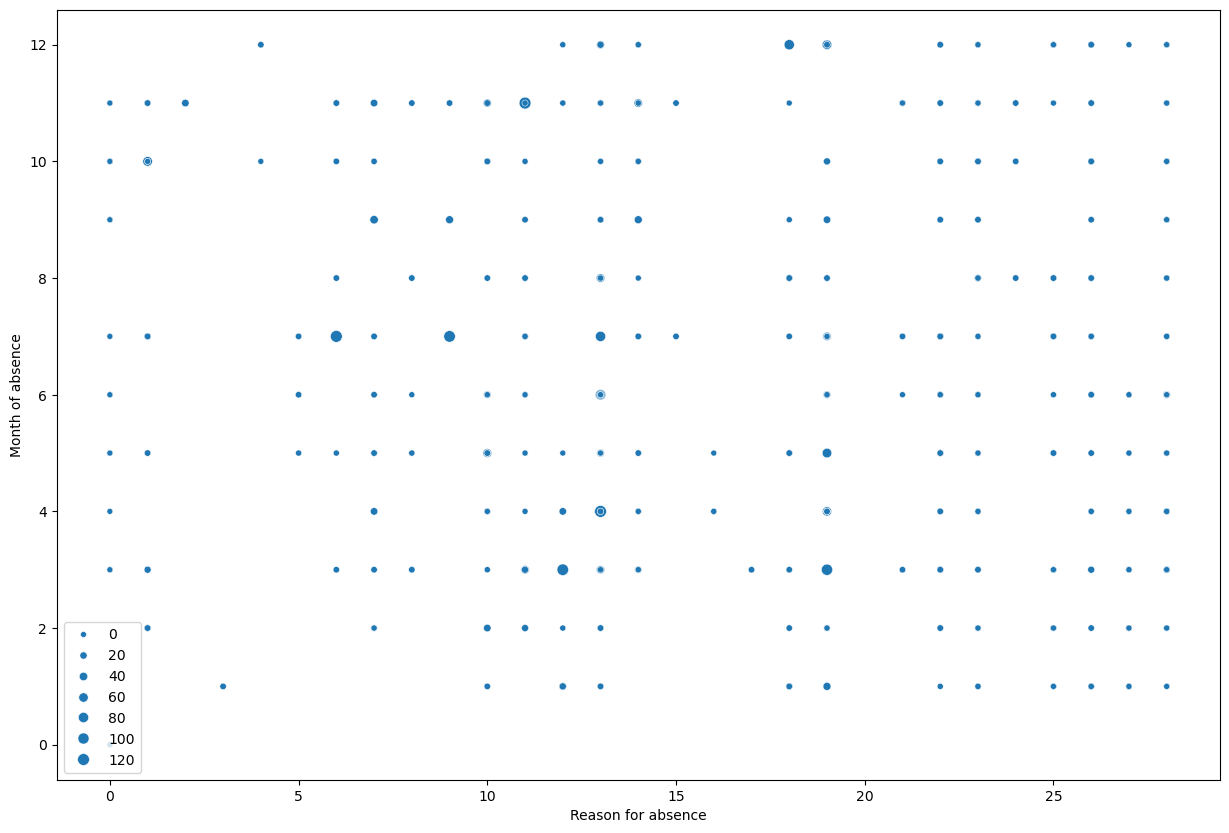

In [83]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = 'Reason for absence', y = 'Month of absence',size = 'Absenteeism time in hours')
plt.legend()
plt.show()

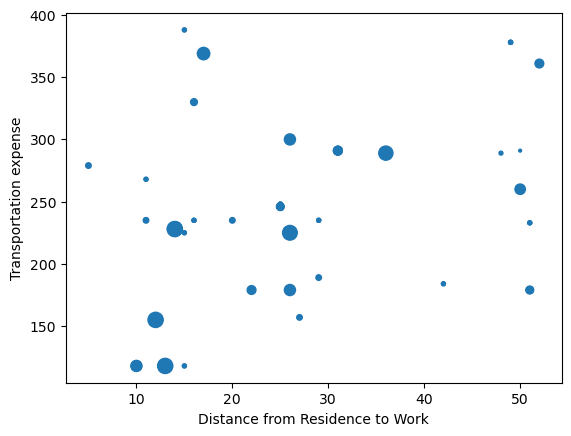

In [109]:
plt.scatter(df['Distance from Residence to Work'], df['Transportation expense'], s=df['Absenteeism time in hours'])
plt.xlabel('Distance from Residence to Work')
plt.ylabel("Transportation expense")
plt.show()

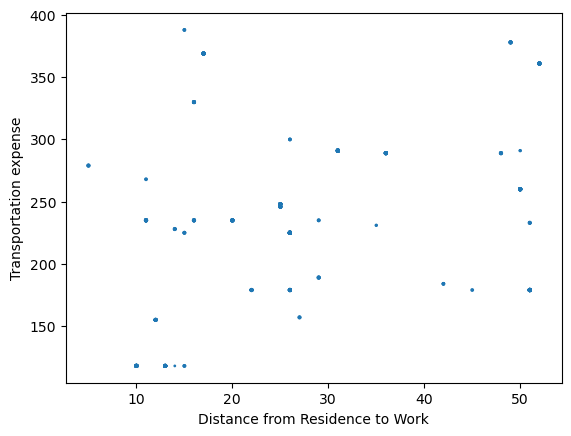

In [115]:
plt.scatter(df['Distance from Residence to Work'], df['Transportation expense'], s=df['Seasons'])
plt.xlabel('Distance from Residence to Work')
plt.ylabel("Transportation expense")
plt.show()

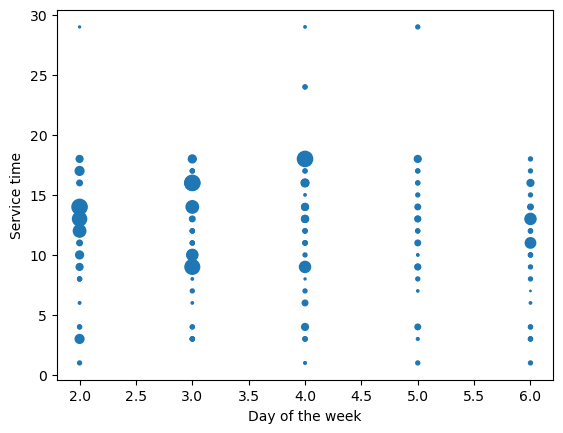

In [117]:
plt.scatter(df['Day of the week'], df['Service time'], s=df['Absenteeism time in hours'])
plt.xlabel('Day of the week')
plt.ylabel("Service time")
plt.show()

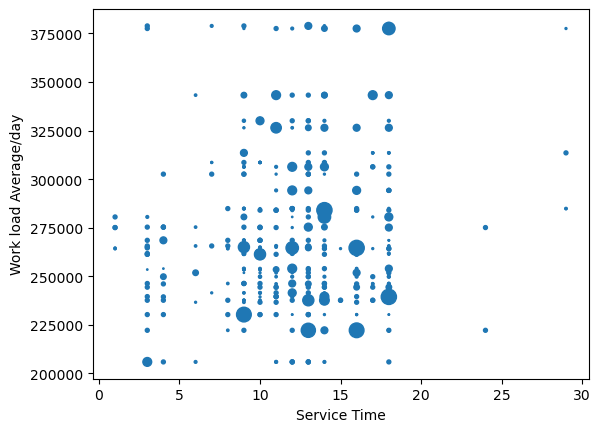

In [123]:
plt.scatter(df['Service time'], df['Work load Average/day'], s=df['Absenteeism time in hours'])
plt.xlabel("Service Time")
plt.ylabel('Work load Average/day')
plt.show()

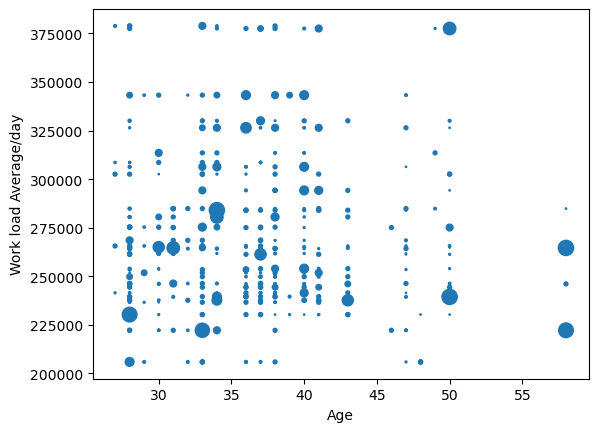

In [125]:
plt.scatter(df['Age'], df['Work load Average/day'], s=df['Absenteeism time in hours'])
plt.xlabel("Age")
plt.ylabel('Work load Average/day')
plt.show()

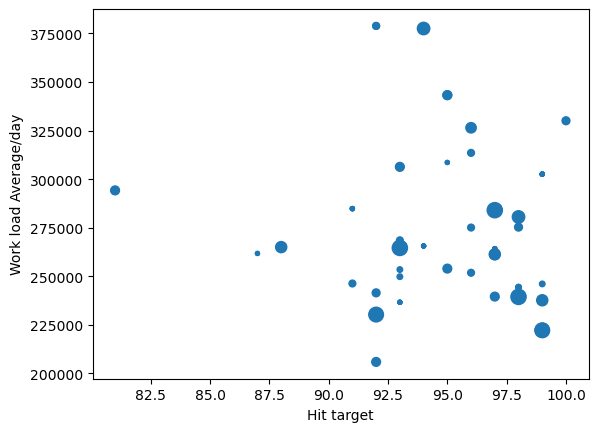

In [127]:
plt.scatter(df['Hit target'], df['Work load Average/day'], s=df['Absenteeism time in hours'])
plt.xlabel("Hit target")
plt.ylabel('Work load Average/day')
plt.show()

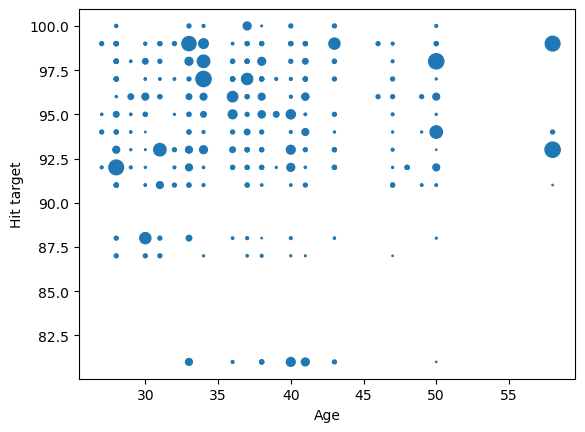

In [131]:
plt.scatter(df['Age'], df['Hit target'], s=df['Absenteeism time in hours'])
plt.xlabel('Age')
plt.ylabel("Hit target")
plt.show()

#### Pair plot

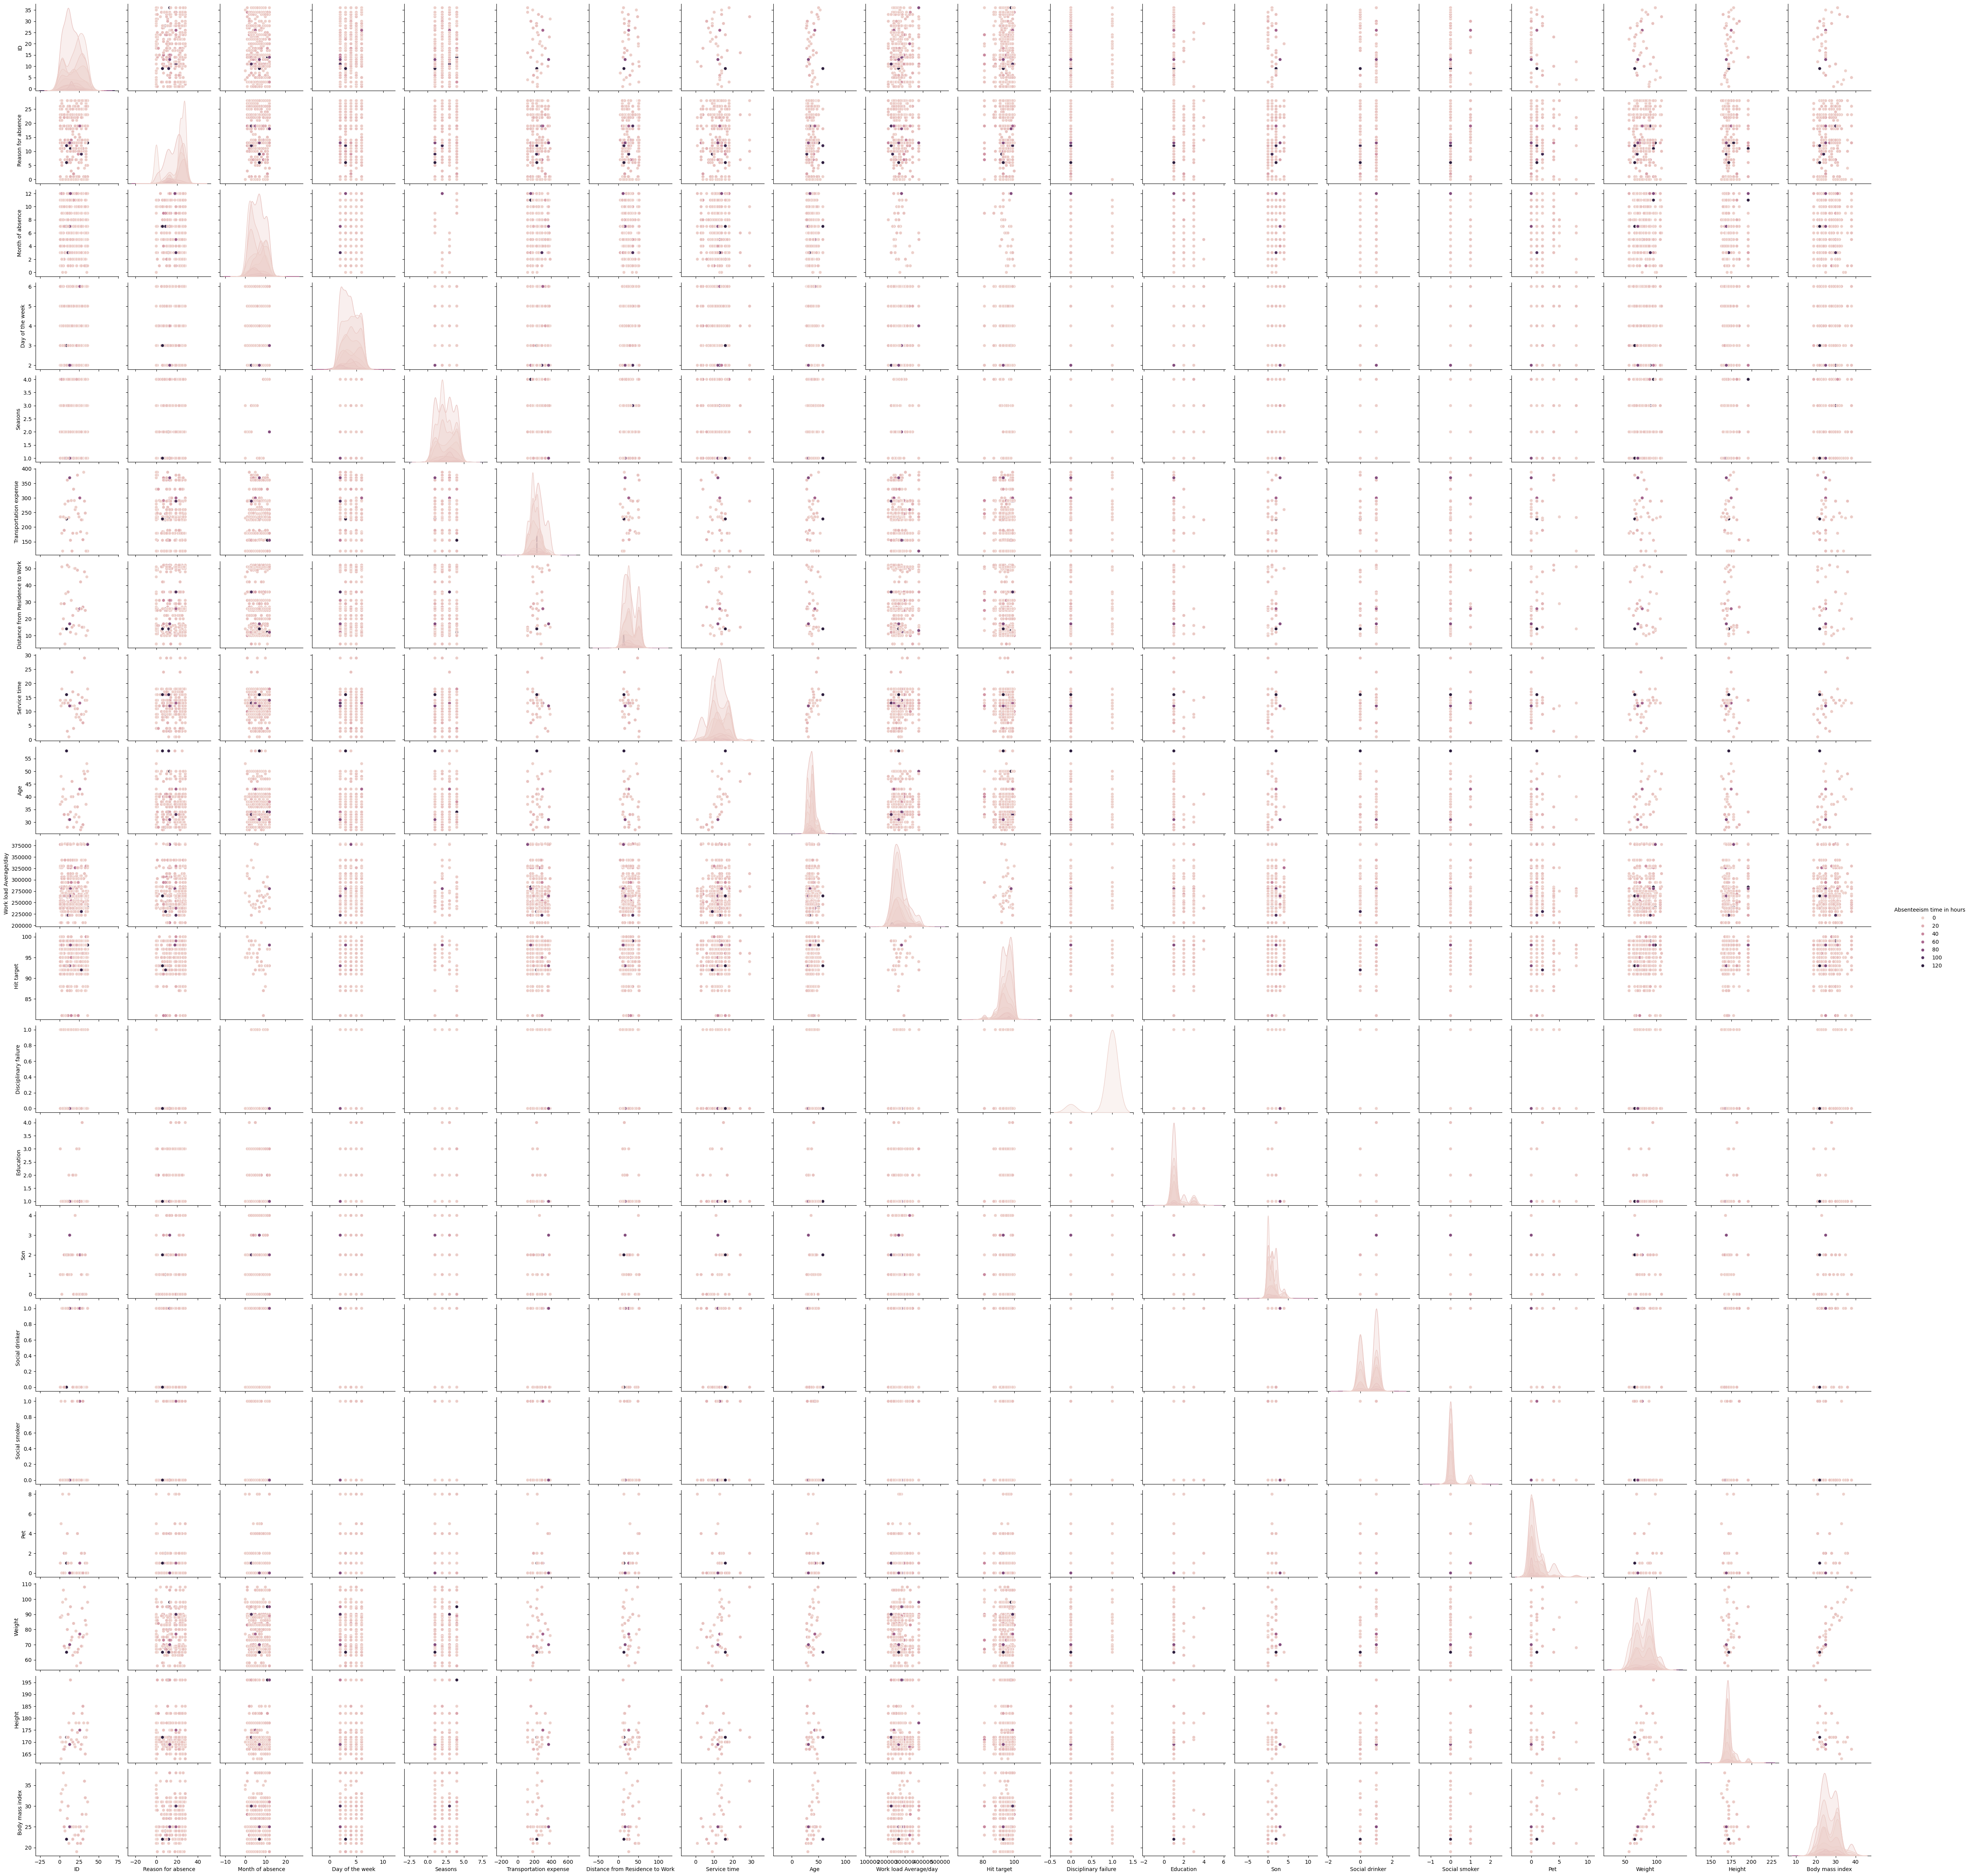

In [135]:
sns.pairplot(data=df, hue='Absenteeism time in hours')
plt.show()

In [169]:
df.corr()

ID  Reason for absence  \
ID                               1.000000           -0.064245   
Reason for absence              -0.064245            1.000000   
Month of absence                -0.000043           -0.083858   
Day of the week                  0.034468            0.116319   
Seasons                          0.098495           -0.117925   
Transportation expense          -0.224163           -0.119381   
Distance from Residence to Work -0.486160            0.161831   
Service time                    -0.272704            0.048425   
Age                              0.040899           -0.078608   
Work load Average/day            0.092457           -0.123473   
Hit target                       0.018789            0.088943   
Disciplinary failure             0.004502           -0.545054   
Education                       -0.036254           -0.047357   
Son                              0.002767           -0.055364   
Social drinker                  -0.451338            0.065441   
Social smoker                   -0.010826           -0.115702   
Pet                             -0.041418           -0.055911   
Weight                          -0.254222           -0.000269   
Height                           0.076363           -0.079267   
Body mass index                 -0.306924            0.037205   
Absenteeism time in hours       -0.017997           -0.173116   

                                 Month of absence  Day of the week   Seasons  \
ID                                      -0.000043         0.034468  0.098495   
Reason for absence                      -0.083858         0.116319 -0.117925   
Month of absence                         1.000000        -0.006528  0.407770   
Day of the week                         -0.006528         1.000000  0.046493   
Seasons                                  0.407770         0.046493  1.000000   
Transportation expense                   0.137525         0.033988  0.036995   
Distance from Residence to Work         -0.003887         0.118026 -0.063108   
Service time                            -0.062862         0.021252 -0.010904   
Age                                     -0.001520         0.004459 -0.012089   
Work load Average/day                   -0.169991         0.015646  0.150439   
Hit target                              -0.460453         0.030986 -0.061154   
Disciplinary failure                     0.107946        -0.015120  0.151766   
Education                               -0.066128         0.058516 -0.002951   
Son                                      0.079031         0.098079  0.046950   
Social drinker                           0.056226         0.041772 -0.045982   
Social smoker                           -0.038603         0.013156 -0.048671   
Pet                                      0.047787        -0.028885  0.012356   
Weight                                   0.023278        -0.128980 -0.026278   
Height                                  -0.068942        -0.082133 -0.033737   
Body mass index                          0.051046        -0.103578 -0.011031   
Absenteeism time in hours                0.024345        -0.124361 -0.005615   

                                 Transportation expense  \
ID                                            -0.224163   
Reason for absence                            -0.119381   
Month of absence                               0.137525   
Day of the week                                0.033988   
Seasons                                        0.036995   
Transportation expense                         1.000000   
Distance from Residence to Work                0.262183   
Service time                                  -0.349887   
Age                                           -0.227542   
Work load Average/day                          0.005438   
Hit target                                    -0.080193   
Disciplinary failure                           0.109222   
Education                                     -0.055065   
Son                  

### Use of PCA

In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

# Fit the PCA object to your data and transform it
pca_df = pca.fit_transform(df.drop(columns = 'Absenteeism time in hours'))

# Convert the transformed data back into a pandas DataFrame
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2','PC3','PC4','PC5'])

# Print the explained variance ratio for each component
print(pca.explained_variance_ratio_)

[9.99996588e-01 2.96315728e-06 1.68350374e-07 1.26753904e-07
 4.40161799e-08]


In [192]:
print(pca.components_)

[[ 2.60889666e-05 -2.66601742e-05 -1.49555692e-05  5.69498361e-07
   4.28239226e-06  9.32163661e-06 -2.60878690e-05 -7.50134116e-08
  -6.53962689e-06  9.99999998e-01 -8.65475528e-06  1.68157530e-07
  -1.29206408e-06  7.82428911e-07 -4.27898291e-07  2.06362497e-07
   2.40107556e-07 -1.27061503e-05  1.59635143e-05 -9.95258726e-06]
 [-3.81939492e-02 -1.46669887e-02  7.03685153e-03  7.60739472e-04
   5.83103358e-04  9.95621372e-01  6.12495463e-02 -2.28479010e-02
  -2.25652356e-02 -7.49354265e-06 -4.47750245e-03  3.62251237e-04
  -5.44007601e-04  6.23683481e-03  1.09464334e-03  1.71916318e-04
   7.88482221e-03 -4.12091355e-02 -1.81518000e-02 -8.97630011e-03]
 [-4.98505829e-01  1.12287713e-01 -1.03623747e-02  3.75798201e-03
  -5.94278286e-03 -4.92343111e-02  7.77037254e-01  1.19251827e-01
   3.03419466e-02  4.31256331e-05 -5.14710479e-03 -1.01321583e-03
  -1.15031984e-02 -5.57553890e-03  1.74952905e-02 -1.87487308e-03
   2.86583563e-03  3.07093419e-01 -7.24836057e-02  1.31548700e-01]
 [-1.21

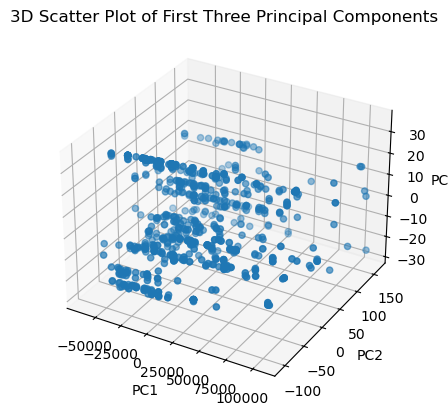

In [194]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of First Three Principal Components')
plt.show()

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df[['PC1', 'PC2', 'PC3']], df['Absenteeism time in hours'], test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=50000)

In [206]:

logreg.fit(X_train, y_train)
coefficients = logreg.coef_
print(coefficients)

feature_names = ['PC1', 'PC2', 'PC3']
df_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Sort the dataframe by the coefficients in descending order
df_coefficients = df_coefficients.sort_values(by='Coefficient', ascending=False)

# Print the dataframe
print(df_coefficients)

[[ 4.59042435e-06  7.70904383e-03  1.02330740e-02]
 [ 4.98699821e-06 -5.49910864e-03  6.48442804e-03]
 [-5.65533350e-06 -6.08848131e-03 -6.01384207e-03]
 [-6.30329162e-06 -6.92683815e-03  1.89702132e-02]
 [-1.00562065e-05  3.88347336e-03  2.46956162e-02]
 [ 4.15769620e-07 -2.86787012e-03 -3.32358120e-02]
 [-6.40370796e-06  3.86203719e-03  1.43229230e-02]
 [ 1.08187741e-06  7.37992499e-03  1.63608301e-03]
 [ 1.35634567e-05  2.69425413e-03 -1.51475521e-02]
 [ 1.69029361e-05  7.88706168e-04 -5.29693643e-03]
 [ 7.89850096e-06 -3.79459167e-03  9.83094074e-04]
 [ 1.13633605e-06  8.70793966e-03  5.48812188e-03]
 [-3.93999705e-06 -2.90114269e-03  5.30845513e-03]
 [ 3.06201452e-06 -2.58211768e-03  5.06229897e-03]
 [-4.27382371e-06 -5.71746978e-04 -3.13268945e-02]
 [ 1.39054837e-07 -2.61846866e-03  7.04944714e-03]
 [-4.90312211e-06  3.25232102e-03  1.26482214e-02]
 [-9.29559857e-06  7.09185909e-06 -1.24375449e-02]
 [-2.94628459e-06 -4.43442637e-03 -9.42339367e-03]]
  Feature  Coefficient
2     P

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'Absenteeism time in hours'), df['Absenteeism time in hours'], test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=50000)

In [214]:
logreg.fit(X_train, y_train)
coefficients = logreg.coef_
print(coefficients)

# Get the feature names from the transformed data
feature_names = X_train.columns

# Create a dataframe with the feature names and coefficients
df_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Sort the dataframe by the coefficients in descending order
df_coefficients = df_coefficients.sort_values(by='Coefficient', ascending=False)

# Print the dataframe
print(df_coefficients)

[[-1.18872475e-02 -2.27844832e-01  4.35155410e-03  1.01250695e-03
   9.47572075e-03  7.64699358e-03 -1.28993618e-02 -1.22696582e-02
   2.50856664e-02  1.16008774e-05 -2.42431735e-02  1.66756089e-02
  -3.02916106e-03  5.14561209e-03  2.12758173e-03  1.94934239e-03
   5.45599601e-03  3.71341446e-02 -9.89187457e-03  2.02163471e-02]
 [ 3.22885912e-02  9.86734988e-02  4.57721868e-02 -6.09307597e-03
   8.78197817e-03 -2.89906425e-03  2.11966076e-02  1.21307592e-02
   1.17132588e-02  1.62894807e-05 -3.73405039e-02 -1.05860870e-03
  -2.02605726e-03 -1.51134718e-02 -5.15407633e-04 -4.96110638e-04
   5.98145333e-03  1.28077358e-02 -1.31775059e-02  1.57733600e-03]
 [ 1.28416281e-02  1.42939524e-01 -6.10610389e-02  1.22132140e-02
  -2.60225884e-03 -7.81303328e-03 -9.90915404e-04  7.75495789e-03
  -7.88882706e-03  4.75593489e-06  4.11134384e-02 -8.06774519e-04
   7.55431519e-03 -1.68250531e-02 -5.31710614e-03 -1.07177452e-03
   4.97518165e-03 -2.38352507e-02 -4.52192958e-03  3.05380801e-03]
 [ 3.89

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [220]:
feature_coeff = df_coefficients.head(5)
feature = feature_coeff['Feature'].tolist()
print(feature)

['Weight', 'Age', 'Body mass index', 'Disciplinary failure', 'Seasons']


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.kernel_approximation import RBFSampler

# Assuming X and Y are your feature and target variables
X_train, X_test, Y_train, Y_test= train_test_split(df.drop(columns = 'Absenteeism time in hours'), df['Absenteeism time in hours'], test_size=0.2, random_state=4)

# Define R2 scorer for GridSearchCV
scorer = make_scorer(r2_score)

# Define hyperparameter grids for each model
param_grids = {
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'decision_tree': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'random_forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'extra_trees': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'gradient_boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'svr': {
        'kernel': ['rbf', 'linear', 'poly'],
        'C': [1e0, 1e2, 1e4],
        'gamma': ['scale', 'auto'],
        'epsilon': [0.1, 1.0, 10.0]
    },
    'mlp': {
        'hidden_layer_sizes': [(50, 50), (100, 100), (200, 200)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'sgd', 'lbfgs'],
        'alpha': [0.001, 0.01, 0.1]
    }
}

# Define models with their parameter grids
models = {
    'ridge': Ridge(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'svr': SVR(),
    'mlp': MLPRegressor()
}

# Function to perform grid search and get the best model for each regression
def grid_search_model(model_name, model, param_grid):
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best R2 Score for {model_name}: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Running GridSearchCV for each model
best_models = {}
for model_name in models:
    best_models[model_name] = grid_search_model(model_name, models[model_name], param_grids[model_name])

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    print(f"R2 Score for {model_name} on test set: {r2}")

Running GridSearchCV for ridge...
Best parameters for ridge: {'alpha': 10.0}
Best R2 Score for ridge: -0.004383891811064045
Running GridSearchCV for decision_tree...
Best parameters for decision_tree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best R2 Score for decision_tree: 0.09811239628674381
Running GridSearchCV for random_forest...
Best parameters for random_forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best R2 Score for random_forest: 0.07186525274484931
Running GridSearchCV for extra_trees...
Best parameters for extra_trees: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best R2 Score for extra_trees: 0.10631271276710907
Running GridSearchCV for gradient_boosting...
Best parameters for gradient_boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best R2 Score for gradient_boosting: 0.11445020098927534
Running GridSearchCV for svr...
